# Oppgave 1

### Visualisering

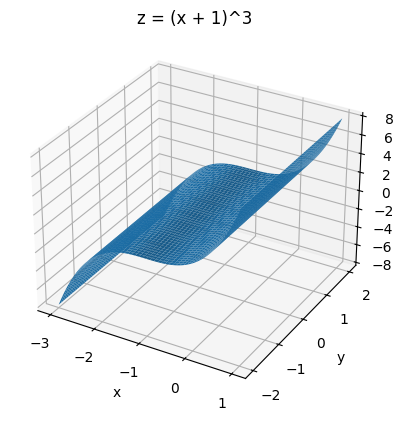

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Lag grid
x = np.linspace(-3, 1, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)

# Funksjon
Z = (X + 1)**3

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("z = (x + 1)^3")

plt.show()


### Løsning

In [9]:
import numpy as np

def newtons_method(f, J_f, x_guess, TOL=1e-6, MAX_ITER = 100):
    x = x_guess

    for i in range(MAX_ITER):
        delta_x = np.linalg.solve(J_f(x), -f(x))
        x += delta_x
        if np.linalg.norm(delta_x) < TOL:
            break

    return x, {"iterations": i, "delta": delta_x}

def f(x):
    return (x + 1)**3

def J_f(x):
    return np.array([
        [3 * (x[0] + 1)**2, 0, 0],
        [0, 3 * (x[1] + 1)**2, 0],
        [0, 0, 3 * (x[2] + 1)**2]])

zero_point, diagnostic_data = newtons_method(f, J_f, np.ones((3,)))
print(f"Zero point: {zero_point}\nNumber of iterations: {diagnostic_data['iterations']}\nDelta: {diagnostic_data['delta']}")


Zero point: [-0.99999908 -0.99999908 -0.99999908]
Number of iterations: 35
Delta: [-4.57840992e-07 -4.57840992e-07 -4.57840992e-07]


# Oppgave 2

### a) Implicit euler

In [ ]:
def implicit_euler_step(f, J_f, x_n, h, TOL=1e-6, MAX_ITER=100):
    def g(x_next):
        return x_next - x_n - h * f(x_next)

    def J_g(x_next):
        return np.eye(len(x_n)) - h * J_f(x_next)

    x_next_guess = x_n
    x_next, _ = newtons_method(g, J_g, x_next_guess, TOL, MAX_ITER)
    return x_next